We will build a logistic regression model to classify more than two classes. We will use a data set comprising of images. And build an image classifier.
1. Use a one vs rest classifier
2. Use a cross entropy loss classifier

In [1]:
data_dir="E:\Work\Machine Learning Course\Python\Module 3 Logistic Regression\Data"

In [2]:
import os
import pandas as pd
import numpy as np
os.chdir(data_dir)
pixel_values=pd.read_csv("mnist_x.csv")
image_labels=pd.read_csv("mnist_y.csv",header=None)
%matplotlib inline

<img src="flatten.png">

In [3]:
## Normalizing the pixel values
pixel_values=pixel_values/255.0

In [4]:
X=pixel_values
y=image_labels[0]

In [5]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.20,random_state=200)

In [6]:
import sklearn.linear_model as linear_model
clf=linear_model.LogisticRegression(multi_class="ovr",penalty="l2",solver="lbfgs")

In [7]:
np.random.seed(200)
mod=model_selection.GridSearchCV(clf,param_grid={"C":np.random.uniform(0.01,100,120)})
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([ 94.76375,  22.66248, ...,  16.85594,  70.5736 ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [8]:
mod.best_params_

{'C': 98.180452888741272}

In [9]:
mod.score(X_test,y_test)

0.96666666666666667

In [10]:
mod.predict_proba(X_test.iloc[0].values.reshape(1,-1))

array([[  8.72070784e-04,   4.38933711e-03,   5.08131225e-04,
          9.14892913e-02,   9.02630202e-04,   8.75211196e-01,
          3.66876325e-04,   5.94956241e-04,   1.67023426e-02,
          8.96316787e-03]])

In [11]:
np.argmax(mod.predict_proba(X_test.iloc[0].values.reshape(1,-1)))

5

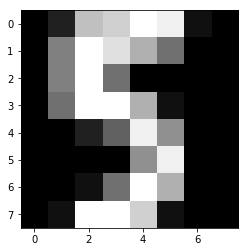

In [12]:
import matplotlib.pyplot as plt
plt.imshow(np.array(X_test.iloc[0]).reshape(8,8),cmap='gray')

In [13]:
np.random.seed(200)
clf=linear_model.LogisticRegression(multi_class="multinomial",penalty="l2",solver="lbfgs")
mod1=model_selection.GridSearchCV(clf,param_grid={"C":np.random.uniform(0.01,100,120)})
mod1.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([ 94.76375,  22.66248, ...,  16.85594,  70.5736 ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [14]:
mod1.best_params_

{'C': 96.604798457712675}

In [15]:
mod1.best_score_

0.9617258176757133

In [16]:
mod1.score(X_test,y_test)

0.97222222222222221

In [17]:
mod1.predict_proba(X_test.iloc[0].values.reshape(1,-1))

array([[  1.95876014e-04,   5.30344028e-04,   1.40232231e-04,
          1.22472607e-02,   1.59436410e-04,   9.82174582e-01,
          9.68677734e-05,   1.62503352e-04,   2.06152454e-03,
          2.23137281e-03]])

In [18]:
np.argmax(mod1.predict_proba(X_test.iloc[0].values.reshape(1,-1)))

5

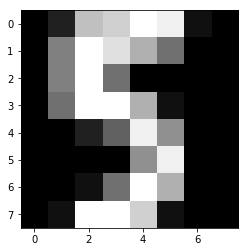

In [19]:
plt.imshow(np.array(X_test.iloc[0]).reshape(8,8),cmap='gray')